In [2]:
import sys
sys.path.insert(0, '../src')

"""
Utils
"""
from termcolor import colored
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt

"""
Modules principaux
"""
from Sequentiel import Sequentiel
from Optim import SGD
from Linear import Linear
"""
Activation
"""
from activation.Softmax import Softmax
from activation.Sigmoide import Sigmoide
from activation.TanH import TanH
"""
Loss
"""
from loss.MSELoss import MSELoss
from loss.CELoss import CELoss

In [3]:
def print_ok():
    print(colored('OK','green'))

def print_ko():
    print(colored('KO','red'))


def onehot_to_vector(y):
    res = []
    for i in range(y.shape[0]):
        res.append(np.argmax(y[i]))
    res = np.array(res)
    return res.reshape((-1,1))

def onehot(y):
    onehot = np.zeros((y.size, y.max() + 1))
    onehot[np.arange(y.size), y] = 1
    return onehot


## TEST SUR USPS

def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx, alltrainy = load_usps(uspsdatatrain)
alltestx, alltesty = load_usps(uspsdatatest)


print(alltrainx.shape)

y = onehot(alltrainy)

(7291, 256)


100%|██████████| 500/500 [00:59<00:00,  8.37it/s]


Taux de bonne classification en train :  73.51529282677274 %
Taux de bonne classification en test :  67.31439960139511 %


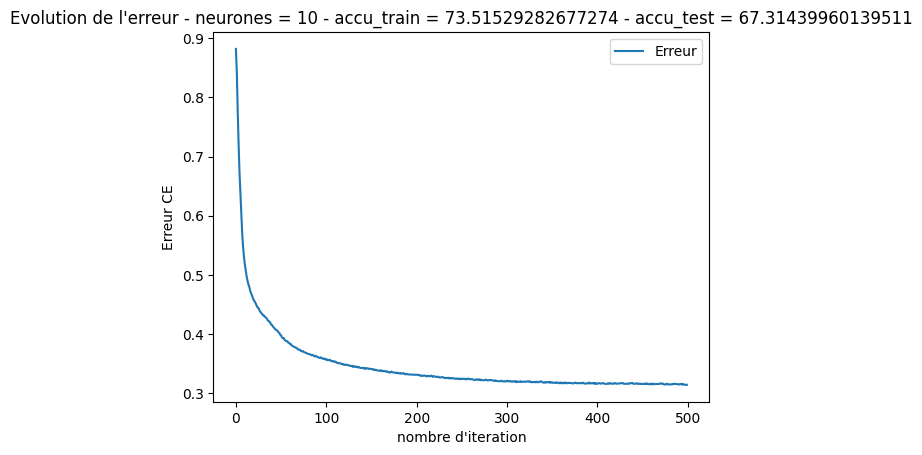

100%|██████████| 500/500 [00:57<00:00,  8.71it/s]

Taux de bonne classification en train :  90.09738033191607 %
Taux de bonne classification en test :  79.92027902341803 %


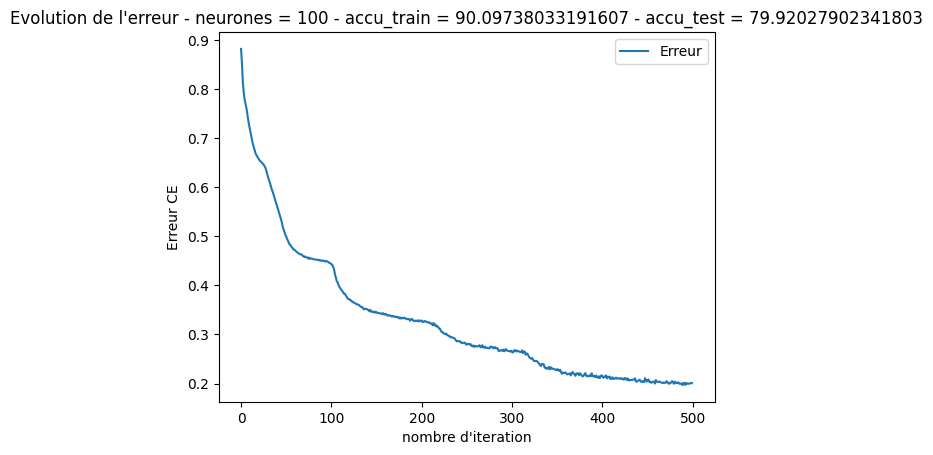

100%|██████████| 500/500 [01:01<00:00,  8.18it/s]


Taux de bonne classification en train :  91.27691674667399 %
Taux de bonne classification en test :  80.66766317887394 %


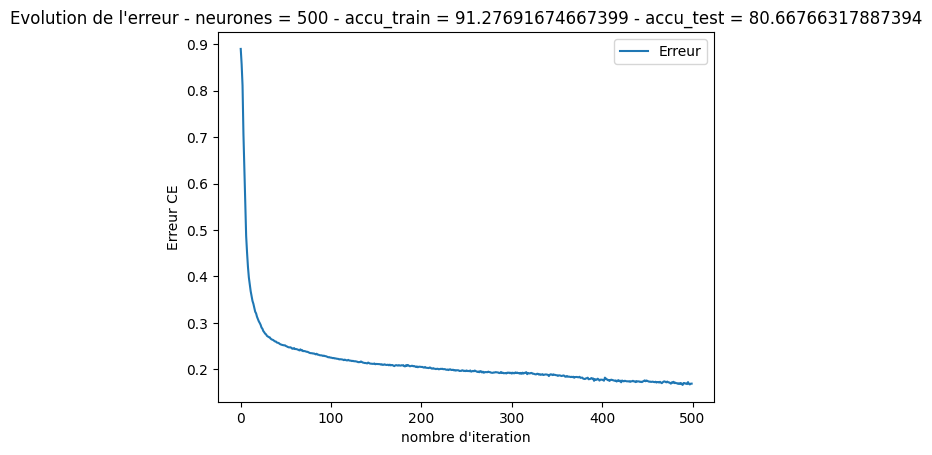

In [5]:
# Evaluer l'impact du nombre de neurones sur l'évolution de l'erreur
n_neurones = [10, 100, 500]
maxIter = 500
eps = 1e-2
batch_size = 10
for n in n_neurones:
    linear1 = Linear(alltrainx.shape[1], 256)
    activation1 = TanH()
    linear2 = Linear(256, n)
    activation2 = TanH()
    linear3 = Linear(n, y.shape[1])
    activation3 = Softmax()
    loss = CELoss()

    model = Sequentiel(Linear(alltrainx.shape[1], 4) , TanH(), Linear(4, y.shape[1]), Softmax())

    optimizer = SGD(model, loss, alltrainx, y, batch_size=batch_size, eps=eps, nbIter=maxIter)
    list_loss = optimizer.update()

    taux_train = ((np.argmax( optimizer.net.forward(alltrainx),axis = 1) == alltrainy).mean()*100)
    taux_test = ((np.argmax( optimizer.net.forward(alltestx),axis = 1) == alltesty).mean()*100)
    print("Taux de bonne classification en train : ",taux_train,"%")
    print("Taux de bonne classification en test : ",taux_test,"%")

    """
    AFFICHAGE DE LA LOSS
    """
    plt.figure()
    plt.xlabel("nombre d'iteration")
    plt.ylabel("Erreur CE")
    plt.title("Evolution de l'erreur - neurones = {} - accu_train = {} - accu_test = {}".format(n, taux_train, taux_test))
    plt.plot(list_loss,label="Erreur")
    plt.legend()
    plt.show()

In [4]:
linear1 = Linear(alltrainx.shape[1], 256)
activation1 = TanH()
linear2 = Linear(256, 128)
activation2 = TanH()
linear3 = Linear(128, y.shape[1])
activation3 = Softmax()
loss = CELoss()

In [5]:
maxIter = 500
eps = 1e-2
batch_size = 10


model = Sequentiel(Linear(alltrainx.shape[1], 4) , TanH(), Linear(4, y.shape[1]), Softmax())

optimizer = SGD(model, loss, alltrainx, y, batch_size=batch_size, eps=eps, nbIter=maxIter)
list_loss = optimizer.update()

taux_train = ((np.argmax( optimizer.net.forward(alltrainx),axis = 1) == alltrainy).mean()*100)
taux_test = ((np.argmax( optimizer.net.forward(alltestx),axis = 1) == alltesty).mean()*100)
print("Taux de bonne classification en train : ",taux_train,"%")
print("Taux de bonne classification en test : ",taux_test,"%")

100%|██████████| 500/500 [00:56<00:00,  8.88it/s]

Taux de bonne classification en train :  69.55150185159786 %
Taux de bonne classification en test :  65.17189835575485 %


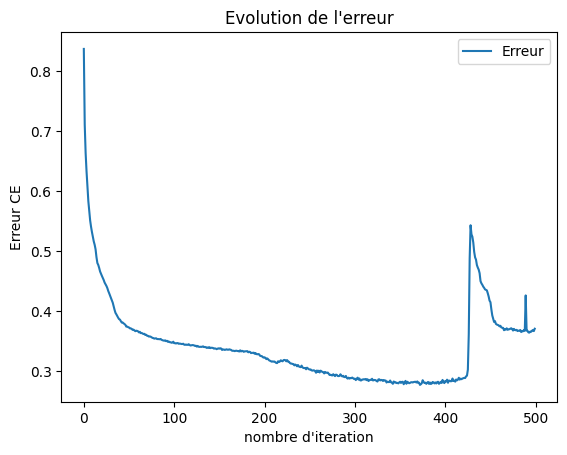

In [6]:
"""
AFFICHAGE DE LA LOSS
"""
plt.figure()
plt.xlabel("nombre d'iteration")
plt.ylabel("Erreur CE")
plt.title("Evolution de l'erreur")
plt.plot(list_loss,label="Erreur")
plt.legend()
plt.show()


predict = model.forward(alltrainx)
predict = np.argmax(predict, axis=1)


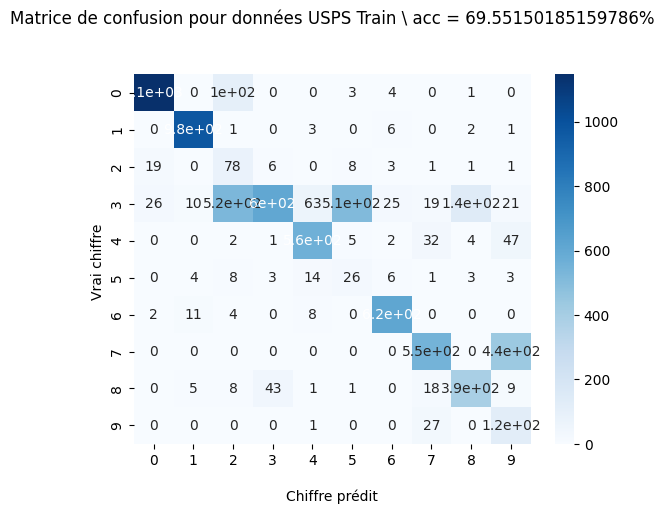

In [7]:
"""
MATRICE DE CONFUSION TRAIN
"""

plt.figure()
confusion = confusion_matrix(predict, alltrainy)



ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(f"Matrice de confusion pour données USPS Train \ acc = {taux_train}%\n\n")
ax.set_xlabel('\nChiffre prédit')
ax.set_ylabel('Vrai chiffre ')

ax.xaxis.set_ticklabels(np.arange(10))
ax.yaxis.set_ticklabels(np.arange(10))

plt.show()

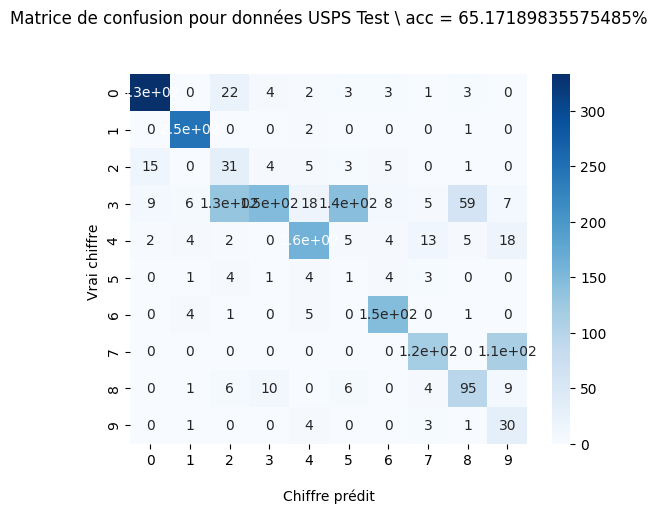

In [8]:
"""
MATRICE DE CONFUSION TEST
"""


predict = model.forward(alltestx)
predict = np.argmax(predict, axis=1)

plt.figure()
confusion = confusion_matrix(predict, alltesty)

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(f"Matrice de confusion pour données USPS Test \ acc = {taux_test}%\n\n")
ax.set_xlabel('\nChiffre prédit')
ax.set_ylabel('Vrai chiffre ')

ax.xaxis.set_ticklabels(np.arange(10))
ax.yaxis.set_ticklabels(np.arange(10))

plt.show()